In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Analysis and Visualizations

In [15]:
sp500_data = pd.read_csv("dataset/updated_sp500_companies.csv")

### Pairwise Relationships and Distribution of S&P 500 Companies by Exchange

<Figure size 1500x1200 with 0 Axes>

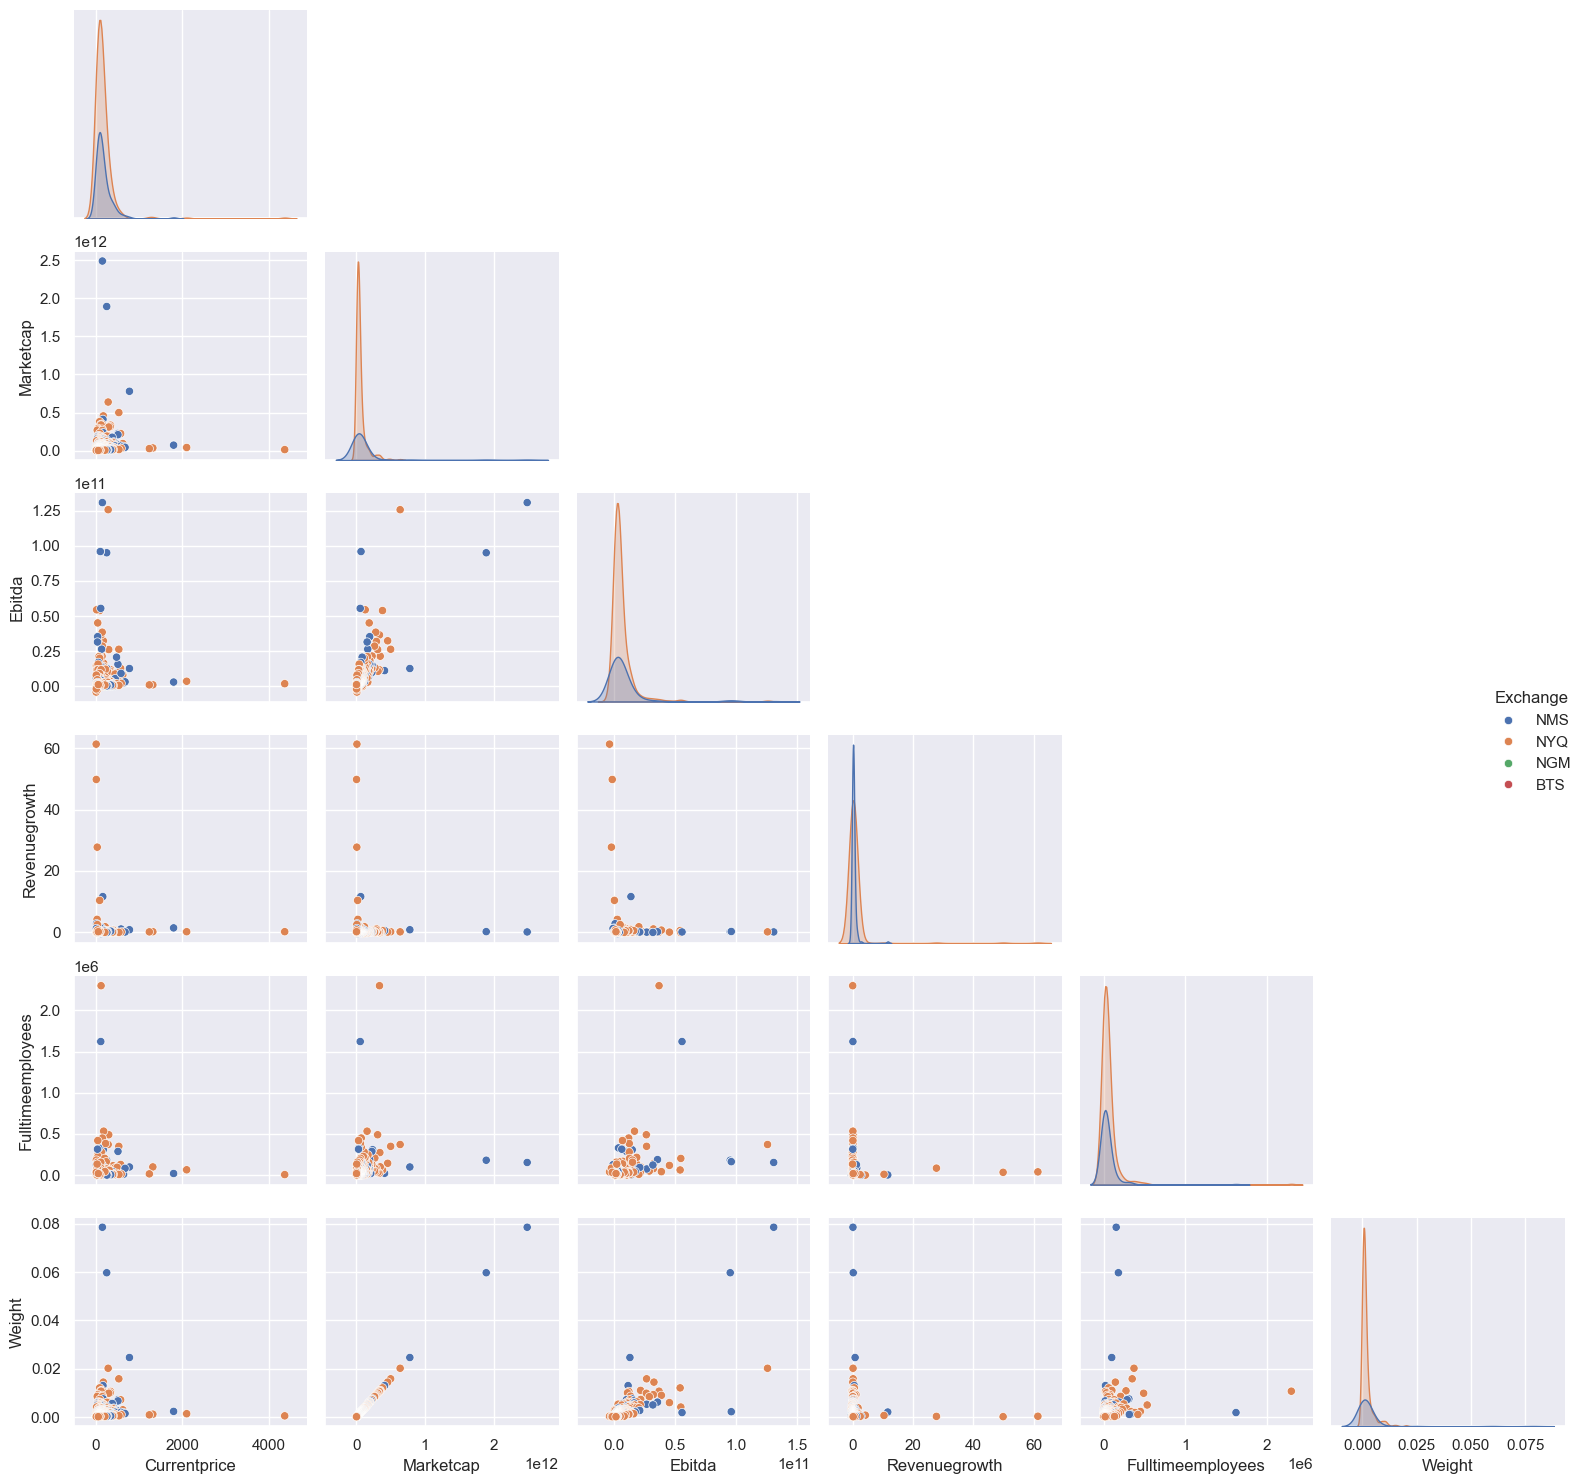

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))

# This plot will show pairwise relationships across the entire dataframe.
# The 'corner' parameter is set to True to avoid redundant plots in the diagonal
# The 'hue' parameter categorizes data points by the 'Exchange' column
sns.pairplot(sp500_data, corner=True, hue="Exchange")

plt.tight_layout()

Key Points:
- Linear relationship between market cap and weights
- Distributions are positively skewed

### Correlation Heatmap of S&P 500 

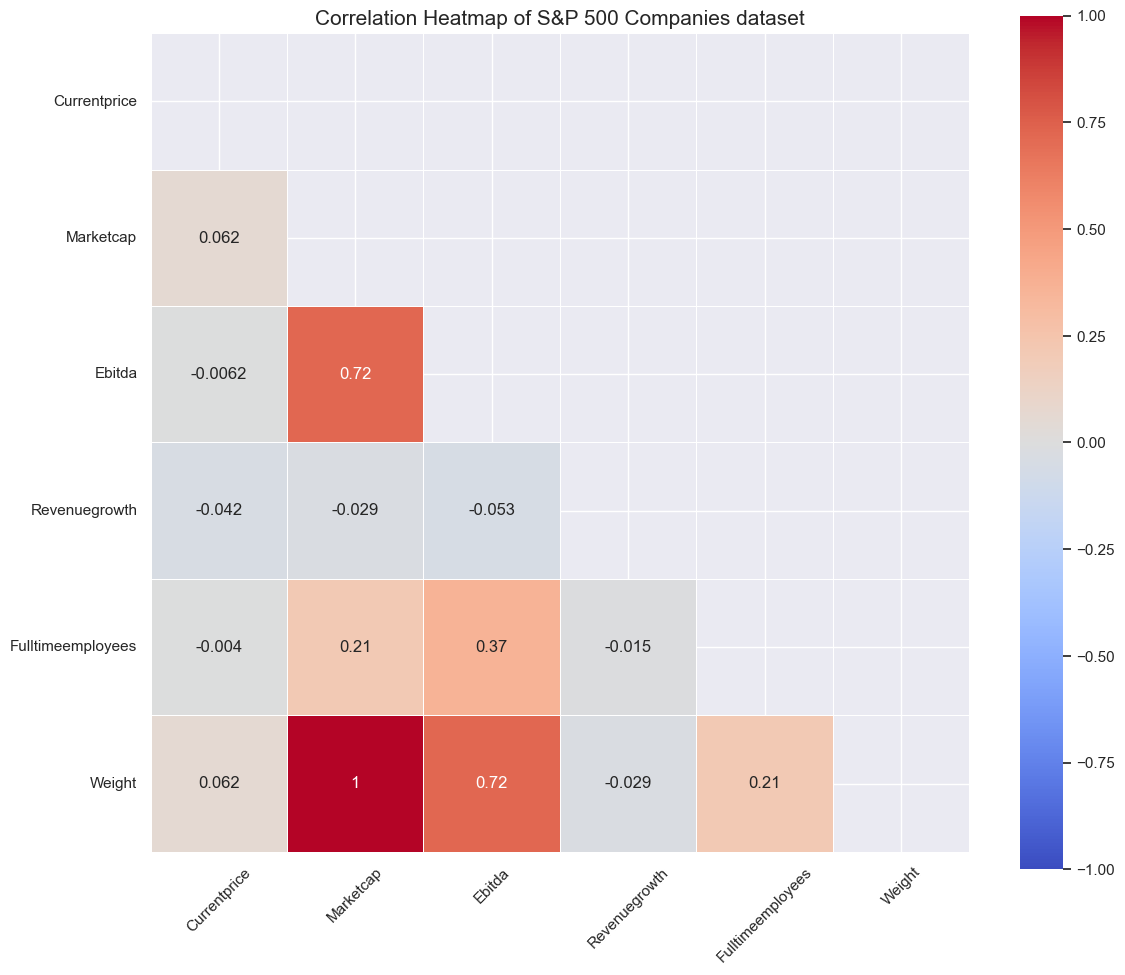

In [18]:
# Filter only numeric columns for correlation calculation
numeric_sp500_data = sp500_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
SP_corr = numeric_sp500_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(SP_corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(SP_corr, mask=mask, center=0,
                      cmap='coolwarm', linewidths=.5, annot=True,
                      square=True, vmax=1, vmin=-1)

heatmap.set_title('Correlation Heatmap of S&P 500 Companies dataset', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

Key Points:
- high positive correlation (1) between marketcap and weights due to s&p being calculated using marketcap
- ebitda shows strong correlation with weights

### Distribution of Exchanges

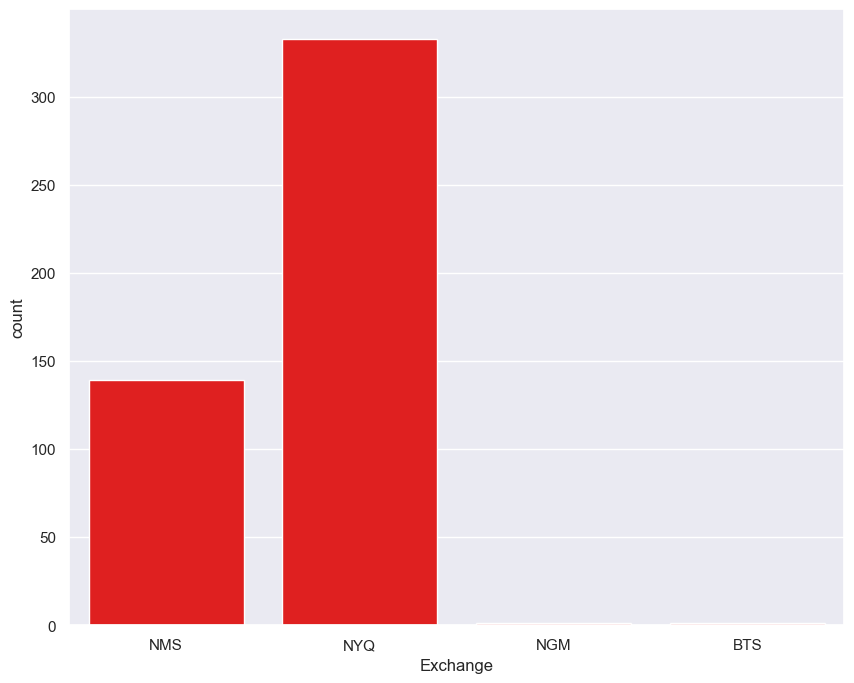

In [20]:
# setup matplotlib
plt.figure(figsize=(10, 8))

# count plot
d0 = sns.countplot(x='Exchange', data=sp500_data, color='red')

Key Points
- S&P 500 are exchanged mostly in NYQ (New York Index)

### Distribution of Revenue Growth

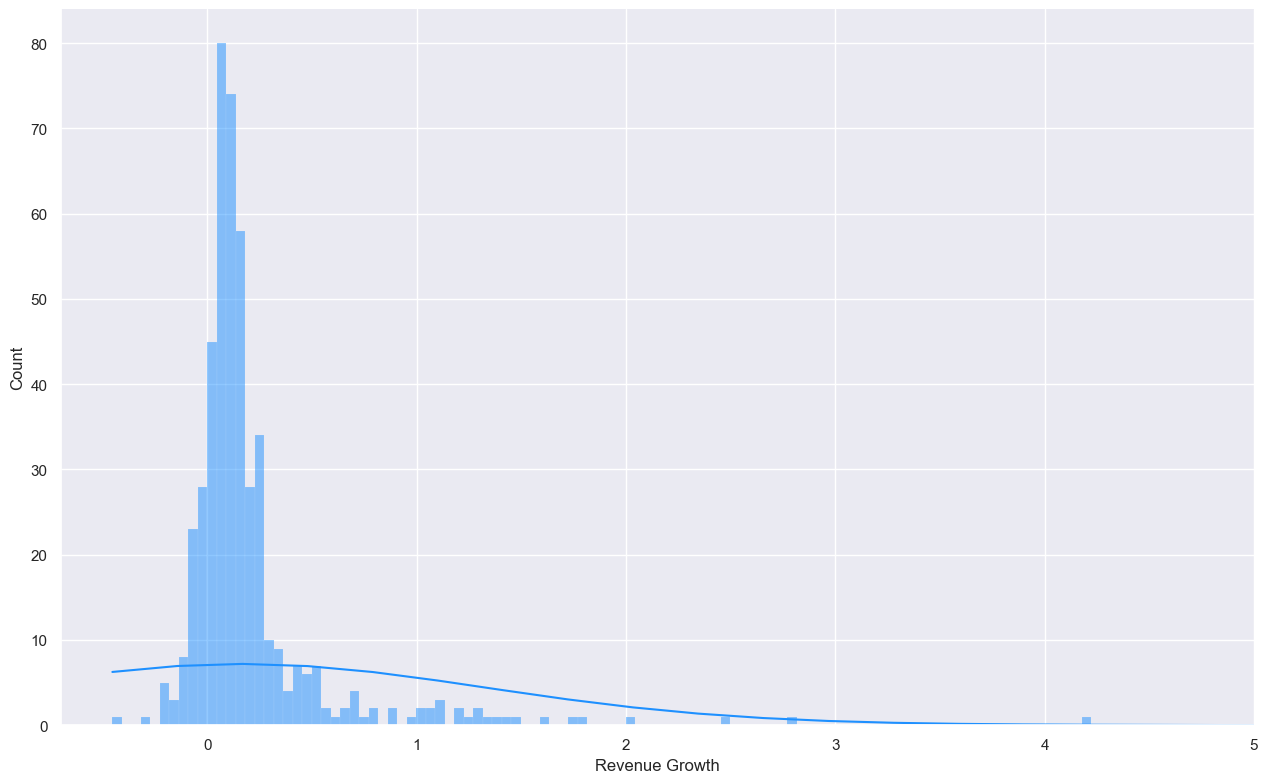

In [22]:
# Create a distribution plot with kernel density estimation
d1 = sns.displot(data=sp500_data, x='Revenuegrowth', height=8, aspect=1.6, kde=True, color='dodgerblue')

# Set the x-axis label
d1.set(xlabel='Revenue Growth')

# Set the limits for the x-axis
d1.set(xlim=(-0.7, 5))

Key Points
- outliers around values 5.0
- most companies revenue growth is 0.2
- alot of companies have negative revenue growth which shows decline in few companies' sales/earnings

### Distribution of Current Price

(0.0, 2100.0)

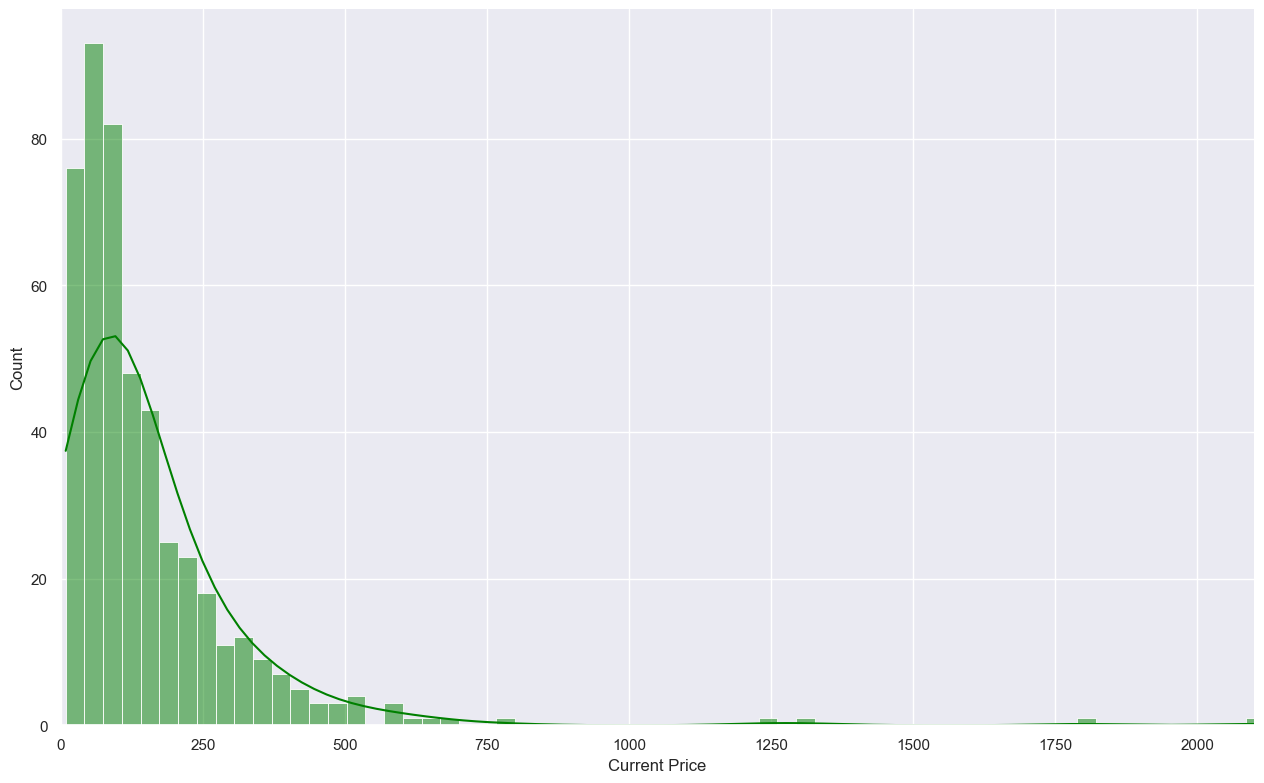

In [26]:
# Create a distribution plot with kernel density estimation for 'CurrentPrice'
d2 = sns.displot(data=sp500_data, x='Currentprice', height=8, aspect=1.6, kde=True, color='green')

# Set the x-axis label
d2.set(xlabel='Current Price')

plt.xlim(0, 2100)

Key Points
- distribution of current price is skewed towards the right
- 2 distinct groups that has highest count of current price